In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
f8 = pd.read_csv('at_cluster_trng (8).txt', sep=' ', header=0)
f16 = pd.read_csv('at_cluster_trng (16).txt', sep=' ', header=0)
f32 = pd.read_csv('at_cluster_trng (32).txt', sep=' ', header=0)
f64 = pd.read_csv('at_cluster_trng (64).txt', sep=' ', header=0)
f128 = pd.read_csv('at_cluster_trng (128).txt', sep=' ', header=0)
g8 = pd.read_csv('at_met_trng (8).txt', sep=' ', header=0)
g16 = pd.read_csv('at_met_trng (16).txt', sep=' ', header=0)
g32 = pd.read_csv('at_met_trng (32).txt', sep=' ', header=0)
g64 = pd.read_csv('at_met_trng (64).txt', sep=' ', header=0)
g128 = pd.read_csv('at_met_trng (128).txt', sep=' ', header=0)

In [6]:
start=0
m_c_8=np.zeros((10,10000-start))
m_c_16=np.zeros((10,10000-start))
m_c_32=np.zeros((10,10000-start))
m_c_64=np.zeros((10,10000-start))
m_c_128=np.zeros((10,10000-start))
m_m_8=np.zeros((10,10000-start))
m_m_16=np.zeros((10,10000-start))
m_m_32=np.zeros((10,10000-start))
m_m_64=np.zeros((10,10000-start))
m_m_128=np.zeros((10,10000-start))
for i in range (10):
    m_c_8[i]=np.array(f8.magnet[start+10000*i:10000+10000*i])
    m_c_16[i]=np.array(f16.magnet[start+10000*i:10000+10000*i])
    m_c_32[i]=np.array(f32.magnet[start+10000*i:10000+10000*i])
    m_c_64[i]=np.array(f64.magnet[start+10000*i:10000+10000*i])
    m_c_128[i]=np.array(f128.magnet[start+10000*i:10000+10000*i])
    m_m_8[i]=np.array(g8.magnet[start+10000*i:10000+10000*i])
    m_m_16[i]=np.array(g16.magnet[start+10000*i:10000+10000*i])
    m_m_32[i]=np.array(g32.magnet[start+10000*i:10000+10000*i])
    m_m_64[i]=np.array(g64.magnet[start+10000*i:10000+10000*i])
    m_m_128[i]=np.array(g128.magnet[start+10000*i:10000+10000*i])

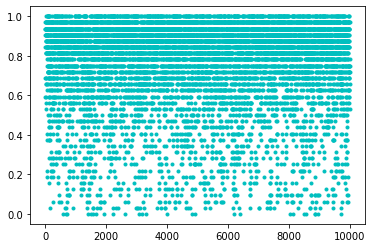

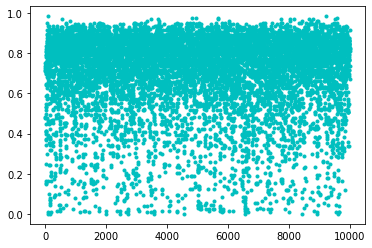

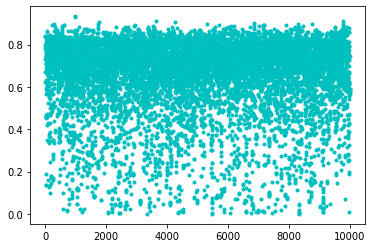

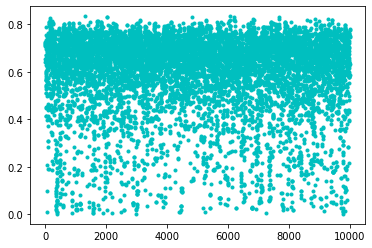

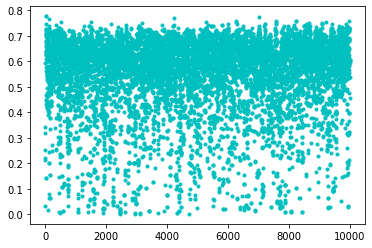

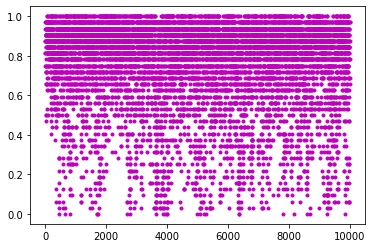

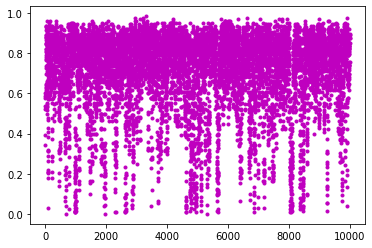

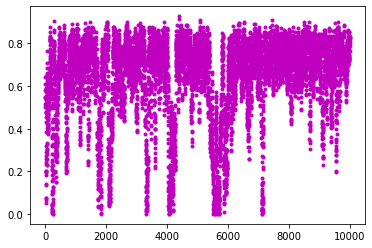

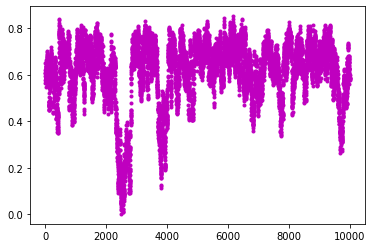

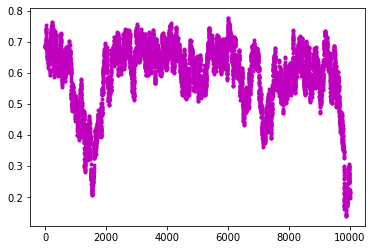

In [15]:
t=np.arange(len(m_t_8[0]))
ith=3
plt.plot(t, m_c_8[ith], 'c.')
plt.show()
plt.plot(t, m_c_16[ith], 'c.')
plt.show()
plt.plot(t, m_c_32[ith], 'c.')
plt.show()
plt.plot(t, m_c_64[ith], 'c.')
plt.show()
plt.plot(t, m_c_128[ith], 'c.')
plt.show()
plt.plot(t, m_m_8[ith], 'm.')
plt.show()
plt.plot(t, m_m_16[ith], 'm.')
plt.show()
plt.plot(t, m_m_32[ith], 'm.')
plt.show()
plt.plot(t, m_m_64[ith], 'm.')
plt.show()
plt.plot(t, m_m_128[ith], 'm.')
plt.show()

In [10]:
def old_attime(yy, n):
    c_0=np.var(yy)
    inside=0
    for i in range(1, n):
        iinside =0
        for j in range (1, n-i):
            iinside = iinside + (yy[i]-np.mean(yy))*(yy[i+j]-np.mean(yy))
        inside = inside + 1/(n-i) * iinside
    return 1+2*inside/c_0

def next_pow_2(n):
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorr_func_1d(x):
    x = np.atleast_1d(x)
    nn = next_pow_2(len(x))
    f = np.fft.fft(x-np.mean(x), n=nn*2)
    acf = np.real(np.fft.ifft(f * np.conjugate(f))[:len(x)])/(4*nn)
    acf = acf / (len(x)-np.arange(len(x)))
    acf = acf/acf[0]
    return acf

def autocorr_time(yy):
    #c_0 = np.var(yy)
    A = autocorr_func_1d(yy)
    return -1+2*np.sum(A[:100])

def auto_window(taus, c):
    m = np.arange(len(taus)) < c * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1
def autocorr_gw2010(y, c=5.0):
    f = autocorr_func_1d(y)
    taus = -1+2*np.cumsum(f)
    window = auto_window(taus, c)
    return taus[window]

In [16]:
c32=np.zeros((10, len(m_c_32[0])))
m32=np.zeros((10, len(m_m_32[0])))
for i in range (10):
    for j in range (1, len(m_c_32[0])):
        c32[i][j]=autocorr_gw2010(m_c_32[i][:j])
        m32[i][j]=autocorr_gw2010(m_m_32[i][:j])

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less


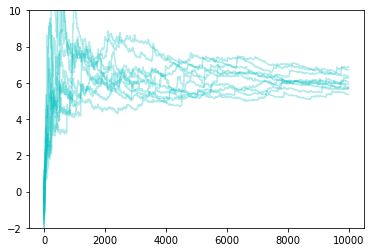

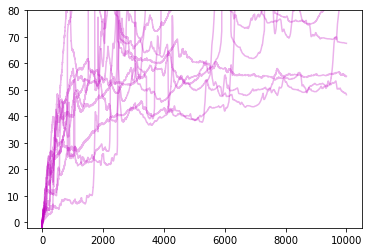

In [22]:
for k in range (10):
    plt.plot(t, c32[k], 'c-', alpha=0.3)
plt.ylim(-2,  10)
plt.show()
for k in range (10):
    plt.plot(t, m32[k], 'm-', alpha=0.3)
plt.ylim(-2,  80)
plt.show()